Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


Target mapping: {'Excellent': np.int64(0), 'Fair': np.int64(1), 'Good': np.int64(2), 'Poor': np.int64(3), 'Very Good': np.int64(4)}
SVC will train on subset of 5000 rows instead of full 247083.
Training SVC (subset)...
Training Random Forest (full)...
Training Logistic Regression (full)...

SVC (baseline, subset-trained) Accuracy: 0.4093
              precision    recall  f1-score   support

   Excellent       0.34      0.05      0.09     11191
        Fair       0.33      0.04      0.08      7162
        Good       0.39      0.44      0.41     19073
        Poor       0.34      0.02      0.03      2266
   Very Good       0.42      0.73      0.54     22079

    accuracy                           0.41     61771
   macro avg       0.37      0.25      0.23     61771
weighted avg       0.39      0.41      0.35     61771



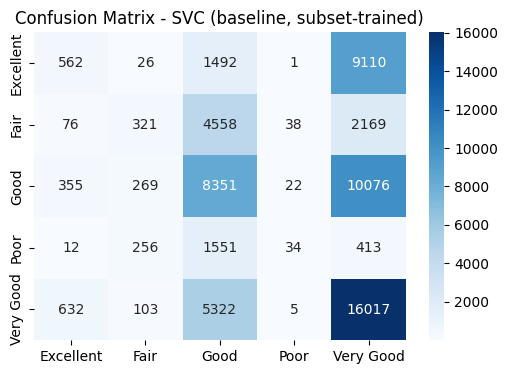


Random Forest (baseline) Accuracy: 0.4066
              precision    recall  f1-score   support

   Excellent       0.40      0.24      0.30     11191
        Fair       0.33      0.17      0.22      7162
        Good       0.39      0.46      0.42     19073
        Poor       0.33      0.07      0.11      2266
   Very Good       0.43      0.56      0.49     22079

    accuracy                           0.41     61771
   macro avg       0.38      0.30      0.31     61771
weighted avg       0.40      0.41      0.39     61771



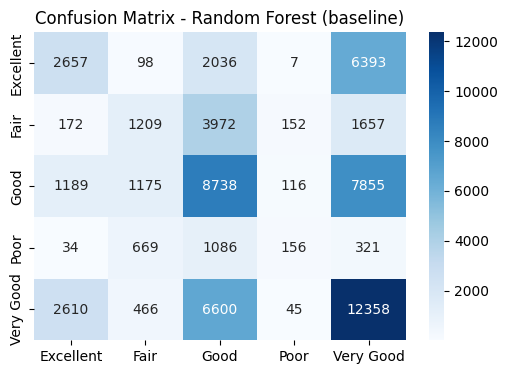


Logistic Regression (baseline) Accuracy: 0.4255
              precision    recall  f1-score   support

   Excellent       0.46      0.13      0.21     11191
        Fair       0.37      0.13      0.19      7162
        Good       0.41      0.43      0.42     19073
        Poor       0.42      0.06      0.10      2266
   Very Good       0.43      0.70      0.54     22079

    accuracy                           0.43     61771
   macro avg       0.42      0.29      0.29     61771
weighted avg       0.42      0.43      0.39     61771



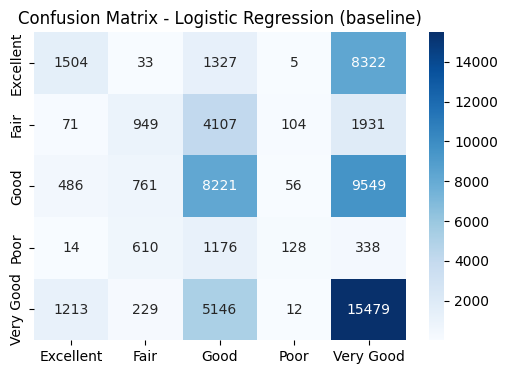

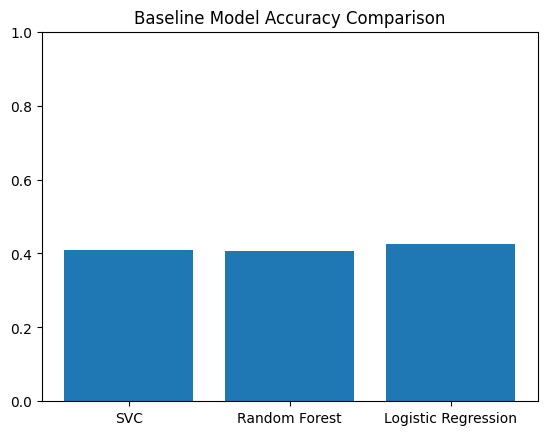


Tuning SVC on subset (n_iter=2)...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'svc__C': np.float64(3.845401188473625), 'svc__gamma': np.float64(0.9517143064099162)}

Tuning Random Forest on full data...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'rf__max_depth': np.int64(10), 'rf__n_estimators': 142}

Tuning Logistic Regression on full data...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'log__C': np.float64(4.468327528535911), 'log__solver': 'lbfgs'}

SVC (tuned, subset-trained) Accuracy: 0.3446
              precision    recall  f1-score   support

   Excellent       0.31      0.08      0.13     11191
        Fair       0.11      0.01      0.01      7162
        Good       0.32      0.09      0.14     19073
        Poor       0.06      0.00      0.00      2266
   Very Good       0.35      0.84      0.49     22079

    accuracy                           0.34     61771
   macro avg   

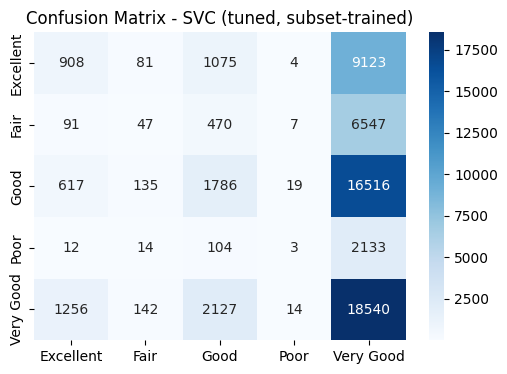


Random Forest (tuned) Accuracy: 0.4237
              precision    recall  f1-score   support

   Excellent       0.60      0.03      0.06     11191
        Fair       0.39      0.08      0.14      7162
        Good       0.41      0.46      0.43     19073
        Poor       0.54      0.01      0.02      2266
   Very Good       0.43      0.74      0.55     22079

    accuracy                           0.42     61771
   macro avg       0.47      0.27      0.24     61771
weighted avg       0.45      0.42      0.36     61771



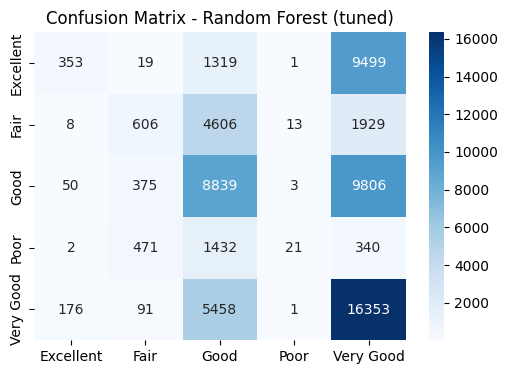


Logistic Regression (tuned) Accuracy: 0.4255
              precision    recall  f1-score   support

   Excellent       0.46      0.13      0.21     11191
        Fair       0.37      0.13      0.19      7162
        Good       0.41      0.43      0.42     19073
        Poor       0.42      0.06      0.10      2266
   Very Good       0.43      0.70      0.54     22079

    accuracy                           0.43     61771
   macro avg       0.42      0.29      0.29     61771
weighted avg       0.42      0.43      0.39     61771



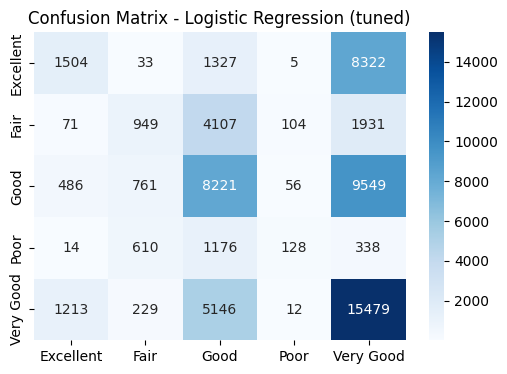

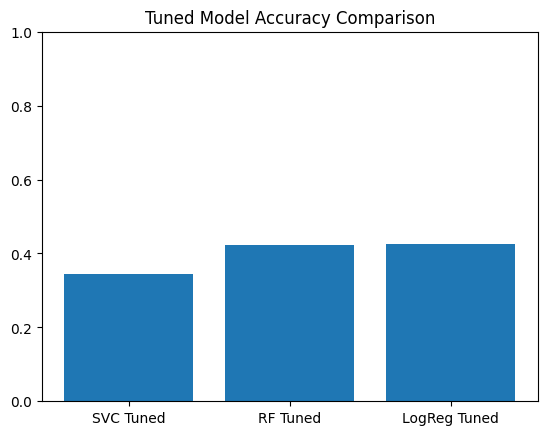


True label: Very Good, Predicted label: Very Good

Best model saved as best_health_model.pkl


In [2]:
# General Health Prediction - Submission Ready Version (Faster)

# 0) Mount Google Drive and set file path
from google.colab import drive
drive.mount('/content/drive')

# Change this path if your file is inside a folder in Drive
file_path = '/content/CVD_cleaned.csv'

# 1) Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2) Load dataset
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)
display(df.head())

# 3) Preprocessing
target_col = 'General_Health'
X = df.drop(columns=[target_col])
y = df[target_col].copy()

# Encode target
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)
print("Target mapping:", dict(zip(le_target.classes_, le_target.transform(le_target.classes_))))

# Convert yes/no columns to 0/1
yesno_cols = []
for c in X.columns:
    vals = set(str(v).strip().lower() for v in X[c].dropna().unique())
    if vals <= {'yes','no'}:
        yesno_cols.append(c)
for c in yesno_cols:
    X[c] = X[c].astype(str).str.lower().map({'yes':1, 'no':0})

# One-hot encode remaining categorical columns
cat_cols = [c for c in X.columns if X[c].dtype == 'object' or X[c].dtype.name == 'category']
X_processed = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 4) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# 5) Create SVC subset for faster training/tuning
svc_subset_size = 5000
subset_idx = np.random.choice(len(X_train), size=min(svc_subset_size, len(X_train)), replace=False)
X_train_svc = X_train.iloc[subset_idx]
y_train_svc = y_train[subset_idx]

print(f"SVC will train on subset of {X_train_svc.shape[0]} rows instead of full {X_train.shape[0]}.")

# 6) Model pipelines
pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', probability=True, random_state=42))])
pipe_log = Pipeline([('scaler', StandardScaler()), ('log', LogisticRegression(max_iter=2000, random_state=42))])
pipe_rf  = Pipeline([('rf', RandomForestClassifier(random_state=42))])

# 7) Train models
print("Training SVC (subset)...")
pipe_svc.fit(X_train_svc, y_train_svc)
print("Training Random Forest (full)...")
pipe_rf.fit(X_train, y_train)
print("Training Logistic Regression (full)...")
pipe_log.fit(X_train, y_train)

# 8) Evaluation function
def evaluate_model(name, model, X_t, y_t):
    y_pred = model.predict(X_t)
    acc = accuracy_score(y_t, y_pred)
    print(f"\n{name} Accuracy:", round(acc,4))
    print(classification_report(y_t, y_pred, target_names=le_target.classes_))
    cm = confusion_matrix(y_t, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    return acc

# 9) Baseline evaluation
acc_svc = evaluate_model("SVC (baseline, subset-trained)", pipe_svc, X_test, y_test)
acc_rf  = evaluate_model("Random Forest (baseline)", pipe_rf, X_test, y_test)
acc_log = evaluate_model("Logistic Regression (baseline)", pipe_log, X_test, y_test)

# 10) Accuracy comparison
plt.bar(['SVC', 'Random Forest', 'Logistic Regression'], [acc_svc, acc_rf, acc_log])
plt.ylim(0,1)
plt.title("Baseline Model Accuracy Comparison")
plt.show()

# 11) Hyperparameter tuning
from scipy.stats import randint as sp_randint, uniform as sp_uniform

svc_param_dist = {'svc__C': sp_uniform(0.1, 10), 'svc__gamma': sp_uniform(0.001, 1.0)}
rf_param_dist  = {'rf__n_estimators': sp_randint(50, 200), 'rf__max_depth': [None] + list(sp_randint(5, 30).rvs(5))}
log_param_dist = {'log__C': sp_uniform(0.01, 10), 'log__solver': ['lbfgs','saga']}

def randomized_search(pipe, param_dist, X_tr, y_tr, n_iter=5):
    rs = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=n_iter,
                            cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
    rs.fit(X_tr, y_tr)
    print("Best parameters:", rs.best_params_)
    return rs.best_estimator_

print("\nTuning SVC on subset (n_iter=2)...")
best_svc = randomized_search(pipe_svc, svc_param_dist, X_train_svc, y_train_svc, n_iter=2)
print("\nTuning Random Forest on full data...")
best_rf  = randomized_search(pipe_rf, rf_param_dist, X_train, y_train, n_iter=5)
print("\nTuning Logistic Regression on full data...")
best_log = randomized_search(pipe_log, log_param_dist, X_train, y_train, n_iter=5)

# 12) Evaluate tuned models
acc_svc_t = evaluate_model("SVC (tuned, subset-trained)", best_svc, X_test, y_test)
acc_rf_t  = evaluate_model("Random Forest (tuned)", best_rf, X_test, y_test)
acc_log_t = evaluate_model("Logistic Regression (tuned)", best_log, X_test, y_test)

# 13) Tuned accuracy comparison
plt.bar(['SVC Tuned', 'RF Tuned', 'LogReg Tuned'], [acc_svc_t, acc_rf_t, acc_log_t])
plt.ylim(0,1)
plt.title("Tuned Model Accuracy Comparison")
plt.show()

# 14) Single sample prediction with best tuned model
best_idx = np.argmax([acc_svc_t, acc_rf_t, acc_log_t])
best_model = [best_svc, best_rf, best_log][best_idx]

sample_idx = np.random.choice(X_test.shape[0])
sample_X = X_test.iloc[[sample_idx]]
true_label = le_target.inverse_transform([y_test[sample_idx]])[0]
pred_label = le_target.inverse_transform([best_model.predict(sample_X)][0])[0]

print(f"\nTrue label: {true_label}, Predicted label: {pred_label}")

# Save best model
import joblib
joblib.dump(best_model, 'best_health_model.pkl')
print("\nBest model saved as best_health_model.pkl")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')